***Case Study: Furniture Sales Analysis
Background

A retail company in the furniture and office supplies industry wants to improve its profitability and customer satisfaction. They have provided you with a dataset containing sales transactions between 2014–2017. Each record includes information such as the customer, product, sales value, discount, profit, region, and shipping details.

The company is facing challenges:

Certain sub-categories are unprofitable despite high sales.

Discount policies may be reducing profit margins.

Delivery times vary across shipping modes and regions.

Management wants to identify the best customer segments and the most profitable products.

You have been hired as a Data Analyst to make data-driven recommendations.

Tasks to Solve
1. Sales & Profit Overview

What are the total sales, total profit, and total quantity sold?

How do sales and profit vary by region and customer segment?

2. Category & Sub-Category Insights

Which categories contribute the most to sales?

Which sub-categories are most profitable, and which consistently record losses?

Identify any products that generate high sales but low/negative profit.

3. Discounts & Profitability

What is the relationship between discount percentage and profit?

At what discount range do most losses occur?

Should the company adjust its discount strategy?

4. Time-Based Trends

How have sales and profits trended over the years (2014–2017)?

Which months or quarters consistently generate the most revenue?

Are there seasonal patterns in sales?.***

### Import the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings 
warnings.filterwarnings("ignore")

In [2]:
## Load the dataset
df = pd.read_csv(r"C:\Users\User Pc\Desktop\DataScience_learn\dataset\Furniture_Sales.csv",encoding='latin1')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
df.tail(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2111,9932,CA-2015-104948,11/13/2015,11/17/2015,Standard Class,KH-16510,Keith Herrera,Consumer,United States,San Bernardino,...,92404,West,FUR-BO-10004357,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320,4,0.15,-40.1960
2112,9938,CA-2016-164889,6/3/2016,6/6/2016,Second Class,CP-12340,Christine Phan,Corporate,United States,Los Angeles,...,90049,West,FUR-TA-10001676,Furniture,Tables,Hon 61000 Series Interactive Training Tables,71.0880,2,0.20,-1.7772
2113,9939,CA-2016-169824,12/12/2016,12/17/2016,Standard Class,NS-18640,Noel Staavos,Corporate,United States,New York City,...,10009,East,FUR-FU-10004864,Furniture,Furnishings,Eldon 500 Class Desk Accessories,60.3500,5,0.00,19.9155
2114,9948,CA-2017-121559,6/1/2017,6/3/2017,Second Class,HW-14935,Helen Wasserman,Corporate,United States,Indianapolis,...,46203,Central,FUR-CH-10003746,Furniture,Chairs,Hon 4070 Series Pagoda Round Back Stacking Chairs,1925.8800,6,0.00,539.2464
2115,9956,CA-2015-141593,12/14/2015,12/16/2015,Second Class,DB-12970,Darren Budd,Corporate,United States,Los Angeles,...,90045,West,FUR-TA-10002622,Furniture,Tables,"Bush Andora Conference Table, Maple/Graphite G...",273.5680,2,0.20,10.2588
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2120,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332


In [5]:
## 2021 rows and 21 columns
df.shape

(2121, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [7]:
###No Null values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [10]:
## No duplicated in the data
df.duplicated().sum()

0

In [11]:
## Drop the row id since it is not useful in our analysis
df.drop(columns=['Row ID'],inplace=True)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [12]:
## Correct the datatypes
df[['Ship Date','Order Date']] = df[['Ship Date','Order Date']].apply(pd.to_datetime, errors='coerce', format=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       2121 non-null   object        
 1   Order Date     2121 non-null   datetime64[ns]
 2   Ship Date      2121 non-null   datetime64[ns]
 3   Ship Mode      2121 non-null   object        
 4   Customer ID    2121 non-null   object        
 5   Customer Name  2121 non-null   object        
 6   Segment        2121 non-null   object        
 7   Country        2121 non-null   object        
 8   City           2121 non-null   object        
 9   State          2121 non-null   object        
 10  Postal Code    2121 non-null   int64         
 11  Region         2121 non-null   object        
 12  Product ID     2121 non-null   object        
 13  Category       2121 non-null   object        
 14  Sub-Category   2121 non-null   object        
 15  Product Name   2121 n

In [13]:
num_cols=df.select_dtypes(include='number')
num_cols

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,33311,957.5775,5,0.45,-383.0310
3,90032,48.8600,7,0.00,14.1694
4,90032,1706.1840,9,0.20,85.3092
...,...,...,...,...,...
2116,77041,383.4656,4,0.32,-67.6704
2117,19711,13.4000,1,0.00,6.4320
2118,70506,85.9800,1,0.00,22.3548
2119,33180,25.2480,3,0.20,4.1028


In [14]:
num_cols.drop(columns=['Postal Code'],inplace=True)
num_cols

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,957.5775,5,0.45,-383.0310
3,48.8600,7,0.00,14.1694
4,1706.1840,9,0.20,85.3092
...,...,...,...,...
2116,383.4656,4,0.32,-67.6704
2117,13.4000,1,0.00,6.4320
2118,85.9800,1,0.00,22.3548
2119,25.2480,3,0.20,4.1028


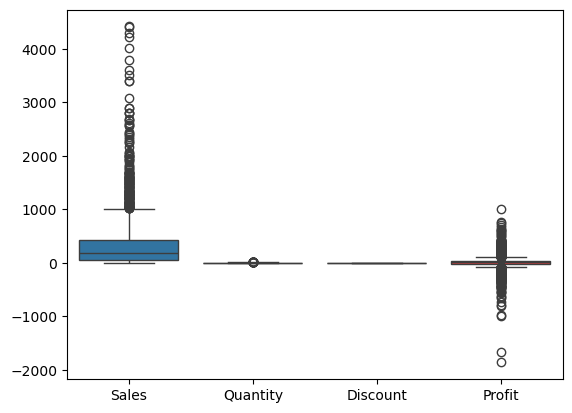

In [15]:
### Check for outliers
sns.boxplot(num_cols)
plt.show()

***Observe we have outliers in the Sales,Quantity and Profit column. We can get rid of outliers for the Sales and Quantity but for the profits we are going to leave them.Reason is because extreme losses and extreme profits can be meaningful in our analysis.***

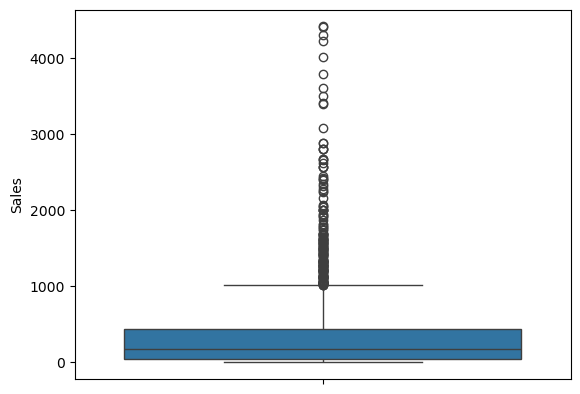

In [16]:
outlier_cols = ['Sales','Quantity']

Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5 * IQR
upper_bound = Q3+1.5 * IQR
df['Sales'].clip(lower_bound,upper_bound)
sns.boxplot(df['Sales'])
plt.show()



In [17]:
df['Profit'].describe()

count    2121.000000
mean        8.699327
std       136.049246
min     -1862.312400
25%       -12.849000
50%         7.774800
75%        33.726600
max      1013.127000
Name: Profit, dtype: float64

### DATA VISUALIZATION

### 1.How does sales and profit vary by region and segment?

[]

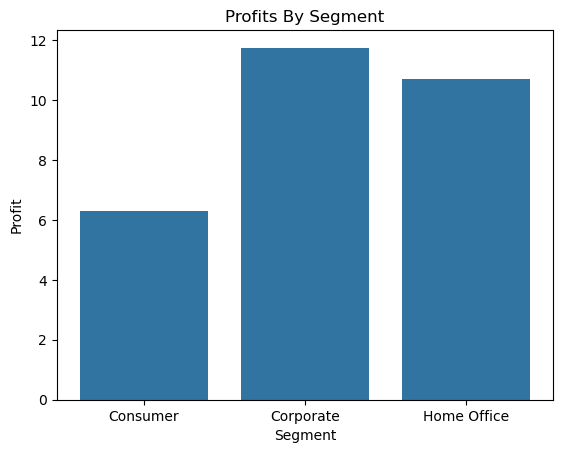

In [18]:
sns.barplot(x='Segment',y='Profit',data=df,errorbar=None)
plt.title("Profits By Segment")
plt.plot()

***Observe that the Corporate market segment generate highest profits.The company should tailor their furnite products to the corporate market.
Note that no segment made losses***

[]

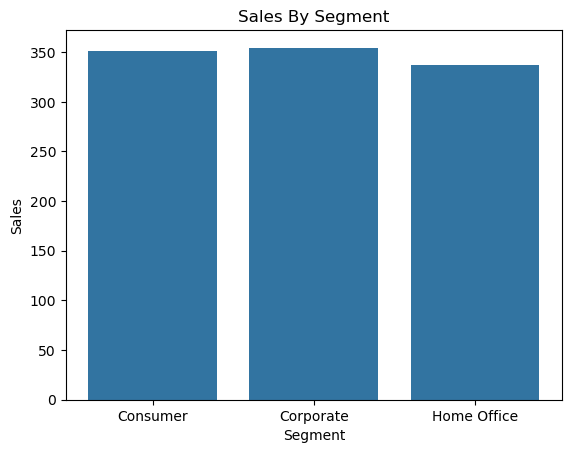

In [19]:
sns.barplot(x='Segment',y='Sales',data=df,errorbar=None)
plt.title("Sales By Segment")
plt.plot()

***Observe that Corporate market is the leading in sales followed by consumer.This explains the reason for high profits generated by Corporate.***

[]

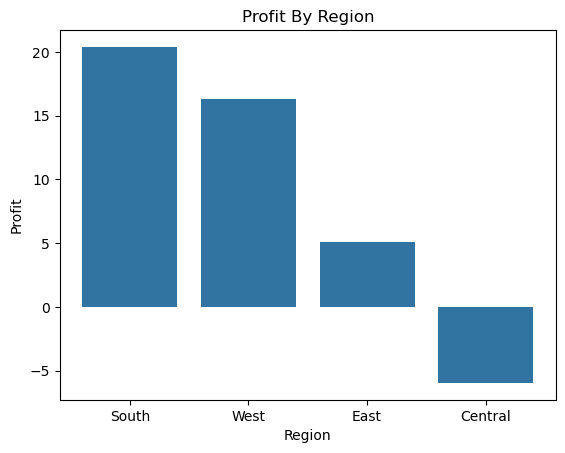

In [20]:
sns.barplot(x='Region',y='Profit',data=df,errorbar=None)
plt.title("Profit By Region")
plt.plot()

***Observe that Southern region generated the highest profits while the central region generated losses.The company should investigate to fid out the reason for high profits in the southern region and apply that to the central region.***

[]

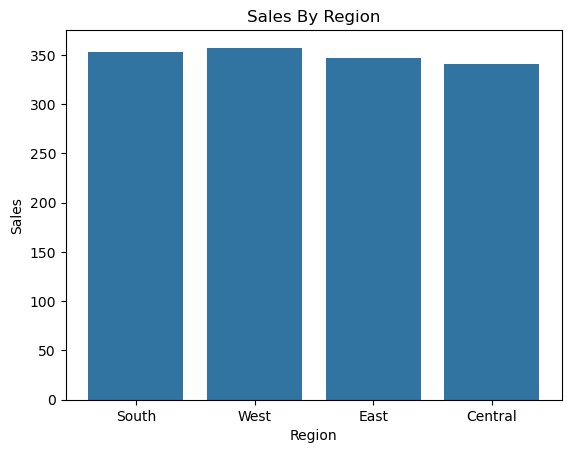

In [21]:
sns.barplot(x='Region',y='Sales',data=df,errorbar=None)
plt.title("Sales By Region")
plt.plot()

***Western region generated the highest revenues folllowed by the southern region.The company should find out the reason for high revenues in the western region and apply those strategies to the eastern and central regions.***

[]

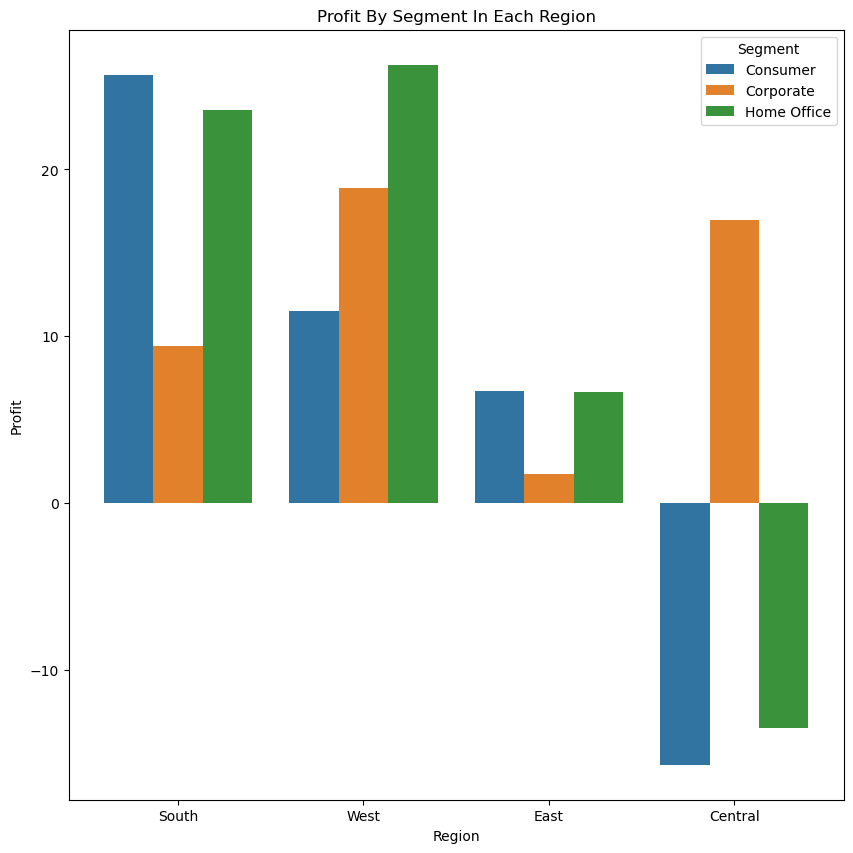

In [22]:
plt.figure(figsize=(10,10))
sns.barplot(x='Region',y='Profit',hue="Segment", data=df,errorbar=None)
plt.title("Profit By Segment In Each Region")
plt.plot()

***Observe that in every region the profitable segment is different.For the southern region the profitable segment is consumer, for the western region the profitable segment is home office,for the eastern region the profitable segments are both consumer and home office and lastly the profitable segment for cenral region is customer while the rest segments generated losses. The company should invest more on the customer segment in the cental region , consumer segment in the southern region, homeoffice for the western region and both home office and consumer for eatern region.The company should also investigate the reason for losses in the central region generated by the home office and consumer segment.***

[]

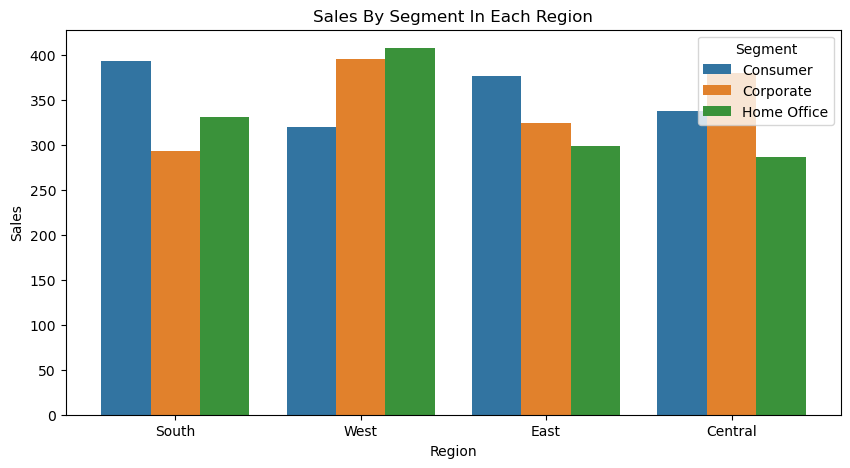

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x='Region',y='Sales',hue="Segment", data=df,errorbar=None)
plt.title("Sales By Segment In Each Region")
plt.plot()

***Observe that every region generated different revenues based on the Segments. Consumer segment generated the highest revenues for the southern region,home office segment generated the highest revenue for the western region, Consumer generated the highest revenue for the eastern region and Corporate generated highest revenues for the central region.***

### Category and Sub-Category Insights? 

[]

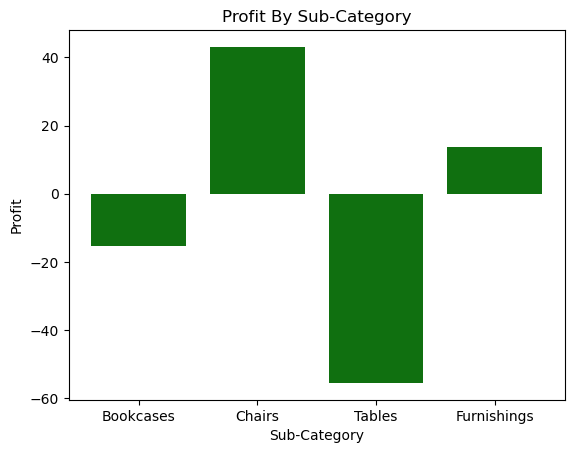

In [24]:
### Which Subcategories are more profitable and which generate more losses
sns.barplot(x='Sub-Category',y='Profit',data=df,errorbar=None,color="green")
plt.title("Profit By Sub-Category")
plt.plot()

***Chairs is the most profitable sub category.On the other hand tables is the sub category with the most losses.The ompany should investigate the reason for high profits generated by chairs and implement the same strategy on the tables,bookcases and furnishings sub category.The company should also increase the production of Chairs as it generates more revenue.***

[]

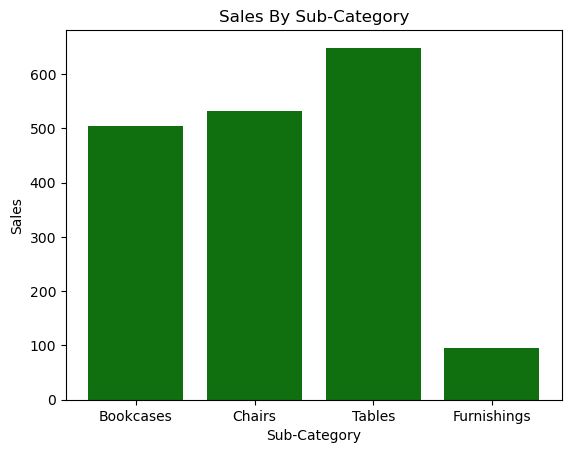

In [25]:
sns.barplot(x='Sub-Category',y='Sales',data=df,errorbar=None, color="green")
plt.title("Sales By Sub-Category")
plt.plot()

***Tables generate the highest revenue followed by chairs then cookcases and lastly furnishings.In contrary tables sub category generate the highest losses.The company should investigate the reason for the high losses.It could be due to high delivery cost or high manufacturing price etc.***

[]

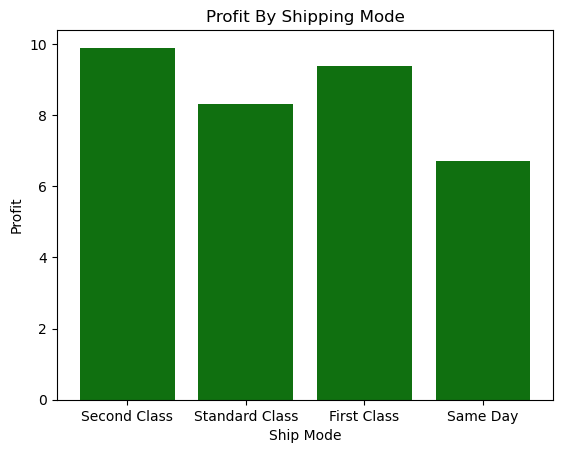

In [26]:
## What is the most profitable shipping mode?
sns.barplot(x='Ship Mode',y='Profit',data=df,errorbar=None,color='green')
plt.title("Profit By Shipping Mode")
plt.plot()

***Second class,first class,standard class and Same day are the most profitable to the least profitable respectively.The company should adopt using the second class shipping mode to maximise their profitability.The company should also invesstigate the reason for high profits in the second class shipping mode and use the same findings to increase profitability for the other shipping modes.***

### Discounts and profits

In [27]:
## Discount and Profit are negatively correlated. 
df[["Discount","Profit"]].corr()

,Discount,Profit
Discount,1.000000,-0.483769
Profit,-0.483769,1.000000


[]

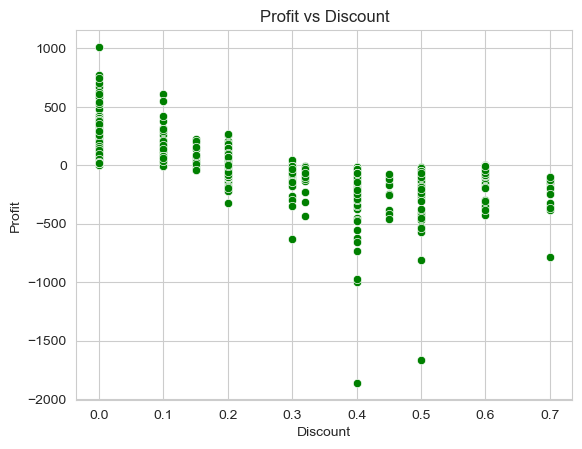

In [31]:
sns.scatterplot(x='Discount',y='Profit',data=df,color='green')
plt.title("Profit vs Discount")
plt.plot()

***There is a moderate negative correlation between discount and profit.This means that discount and profit are inversely proportional.***

[]

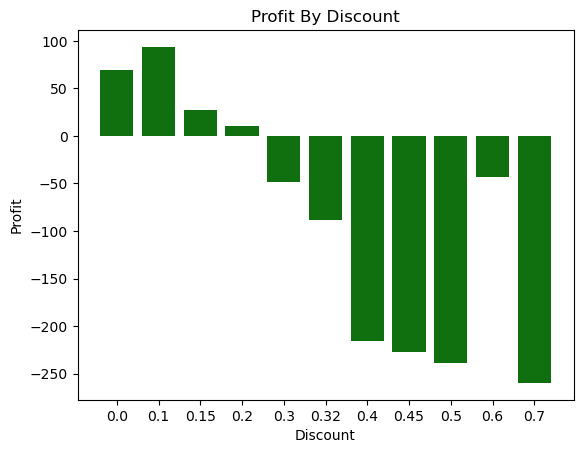

In [28]:
sns.barplot(x='Discount',y='Profit',data=df,errorbar=None,color='green')
plt.title("Profit By Discount")
plt.plot()

***At discounts of 0.67 -0.75 the compony incur the highest losses.The company should avoid giving discounts of above 0.25 to minimize losses and maximize their profits.*** 

[]

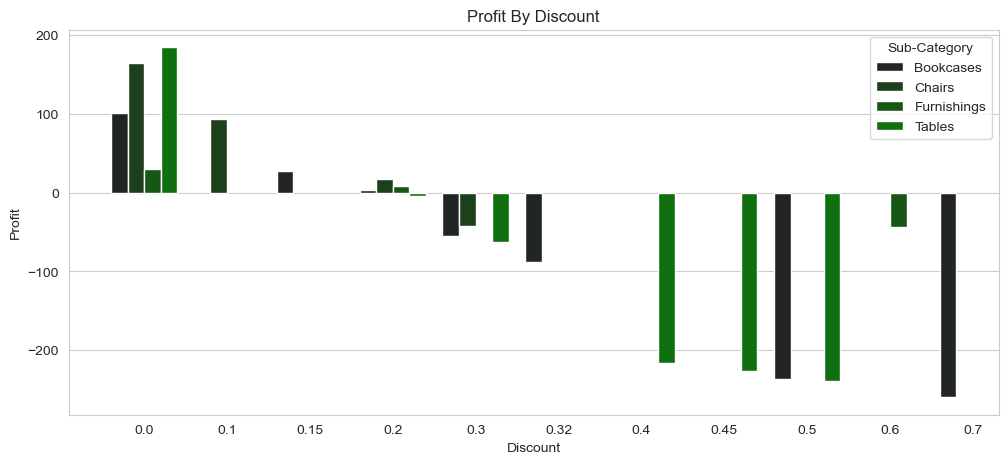

In [35]:
plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
sns.barplot(x='Discount',y='Profit',hue="Sub-Category",data=df,errorbar=None,color='green')
plt.title("Profit By Discount")
plt.plot()

[]

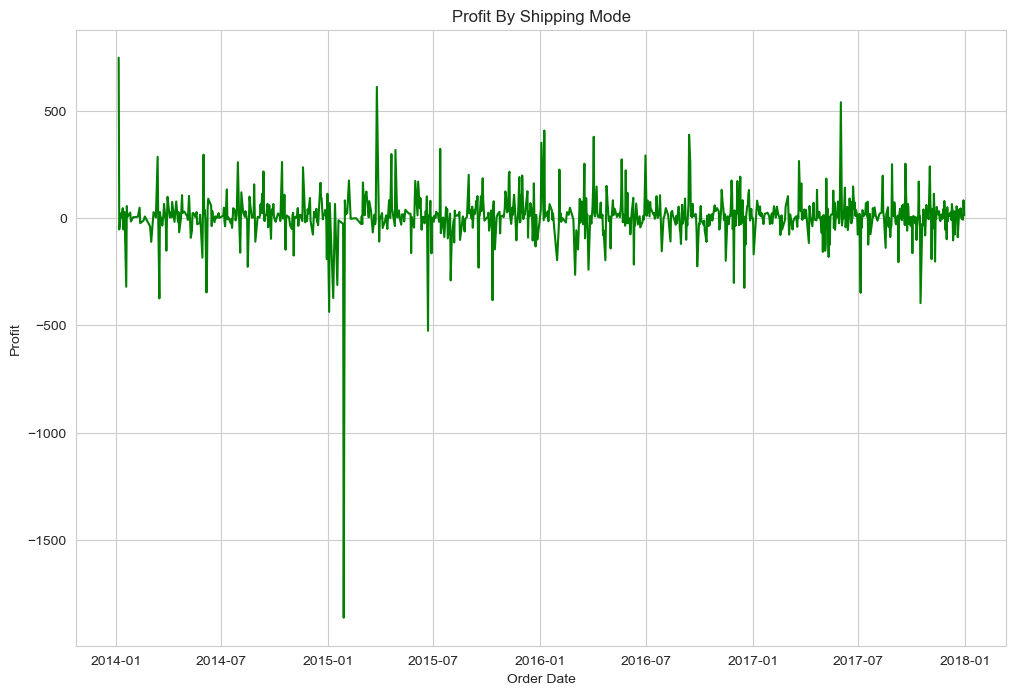

In [29]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.lineplot(x='Order Date',y='Profit',data=df,errorbar=None,color='green')
plt.title("Profit By Shipping Mode")
plt.plot()